In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
model_data = pd.read_csv('history.csv')
model_data = model_data[model_data.columns[1:]]
model_data

,loss,accuracy,val_loss,val_accuracy
0,1.614297,0.362262,1.251435,0.497552
1,1.261149,0.505913,1.089078,0.638005
2,1.092127,0.592429,0.920504,0.661567
3,0.987668,0.640060,0.993911,0.682681
4,0.900206,0.671059,0.754451,0.720012
5,0.843567,0.692553,0.741911,0.725214
6,0.793267,0.707404,0.719756,0.727050
7,0.764932,0.719393,0.750607,0.714504
8,0.739017,0.726684,0.664178,0.759792
9,0.705660,0.740725,0.651909,0.764994


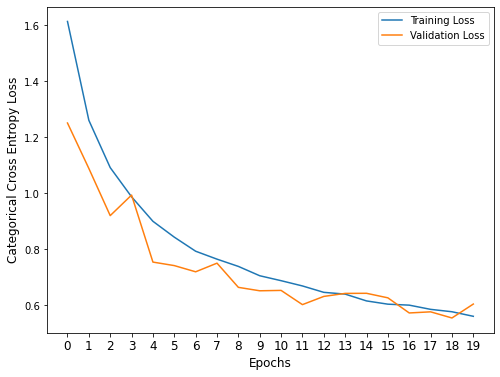

In [3]:
#LOSS PLOT
plt.figure(figsize=[8,6])
plt.plot(model_data['loss'],label='Training Loss')
plt.plot(model_data['val_loss'],label='Validation Loss')
plt.xticks(range(20),fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Categorical Cross Entropy Loss',fontsize=12)
plt.legend()

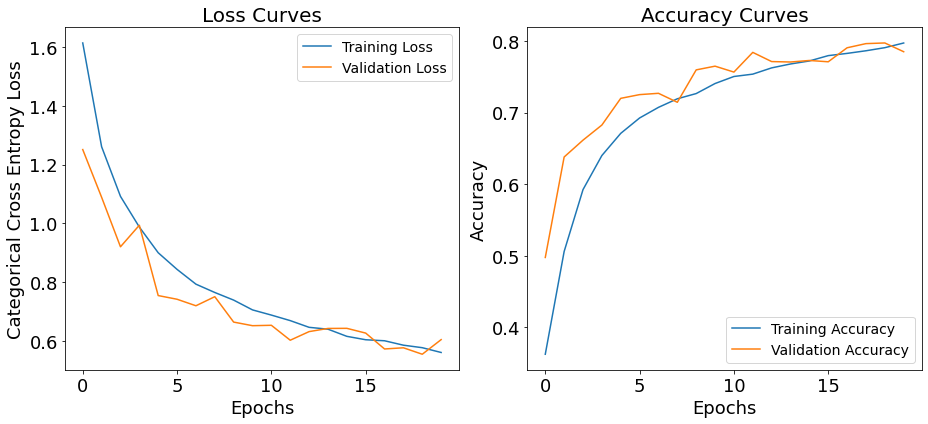

In [6]:
import matplotlib as mpl
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
fig,axarr = plt.subplots(1,2,figsize=(13, 6))
axarr[0].plot(model_data['loss'],label='Training Loss')
axarr[0].plot(model_data['val_loss'],label='Validation Loss')
axarr[0].set_xlabel('Epochs',fontsize=18)
axarr[0].set_ylabel('Categorical Cross Entropy Loss',fontsize=18)
axarr[0].legend(fontsize=14)
axarr[0].set_title('Loss Curves',fontsize=20)

axarr[1].plot(model_data['accuracy'],label='Training Accuracy')
axarr[1].plot(model_data['val_accuracy'],label='Validation Accuracy')
axarr[1].set_xlabel('Epochs',fontsize=18)
axarr[1].set_ylabel('Accuracy',fontsize=18)
axarr[1].legend(fontsize=14)
axarr[1].set_title('Accuracy Curves',fontsize=20)
plt.tight_layout()
plt.savefig('training_curves.pdf')

In [10]:
import numpy as np
with open('test_labels.npy','rb') as f:
    test_labels = np.load(f)

with open('test_predictions.npy','rb') as f:
    model_predictions = np.load(f)

In [12]:
model_predictions

array([[2.8402781e-01, 9.0127628e-08, 1.6694815e-06, ..., 2.5277102e-02,
        6.1080527e-01, 7.9887934e-02],
       [8.5426390e-02, 9.1119355e-01, 3.1419389e-03, ..., 2.2662879e-04,
        8.9871291e-06, 2.6236301e-06],
       [4.6598971e-01, 5.7592141e-03, 4.0694103e-03, ..., 2.1276757e-01,
        2.8662410e-01, 2.4769492e-02],
       ...,
       [5.9050457e-03, 9.9401504e-01, 7.9823520e-05, ..., 1.2365872e-07,
        5.0854640e-11, 1.3436128e-11],
       [2.3390430e-01, 7.0719304e-04, 7.5618958e-01, ..., 4.9615609e-03,
        9.8012586e-04, 1.4124147e-03],
       [1.2073720e-01, 8.7622160e-01, 2.5858190e-03, ..., 4.2549759e-04,
        2.3695971e-05, 6.0902794e-06]], dtype=float32)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels.argmax(axis=1), model_predictions.argmax(axis=1))
cm

array([[ 261,   90,   99,    2,    4,    0,    0,   34,   37,    3],
       [  22, 1008,   27,    0,    0,    0,    0,    0,    0,    0],
       [  31,   54,  845,    0,    1,    0,    0,    0,    0,    0],
       [   3,    0,   10,   13,   27,    0,    4,    0,    0,    0],
       [   7,    0,   12,    4,  211,    0,    8,    0,    0,    0],
       [   0,    0,    0,    0,    5,    0,    0,    0,    0,    0],
       [   3,    0,    2,    3,   19,    0,   71,    0,    0,    2],
       [  47,    6,    1,    0,    0,    0,    0,   78,   27,    1],
       [  42,    1,    0,    0,    0,    0,    0,   11,   59,    2],
       [  22,    2,    4,    0,    2,    0,    0,    0,   21,   20]],
      dtype=int64)

In [15]:
import seaborn as sns

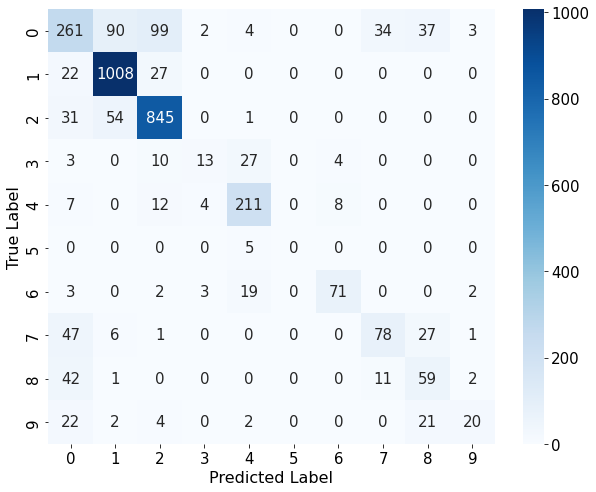

In [38]:
plt.figure(figsize=(10,8))
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
sns.heatmap(cm,annot=True,cmap='Blues',fmt='',annot_kws={"size": 15})
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)
plt.savefig('cm.pdf')

In [41]:
cm.trace()/cm.sum()

0.7851897184822522

In [50]:
label_counts = np.unique(test_labels.argmax(axis=1),return_counts=True)[1]

In [52]:
(label_counts/sum(label_counts))*100

array([16.21787026, 32.34394125, 28.48837209,  1.74418605,  7.40514076,
        0.15299878,  3.05997552,  4.89596083,  3.51897185,  2.17258262])